In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def yolo2xywh(bboxes, H, W):
    transformed_bboxes = np.zeros_like(bboxes)
    transformed_bboxes[:, 0] = bboxes[:, 0]
    transformed_bboxes[:, 1] = (bboxes[:, 1] - bboxes[:, 3]/2) * W
    transformed_bboxes[:, 2] = (bboxes[:, 2] - bboxes[:, 4]/2) * H
    transformed_bboxes[:, 3] = bboxes[:, 3] * W
    transformed_bboxes[:, 4] = bboxes[:, 4] * H
    return transformed_bboxes.astype(int)

In [3]:
def draw_bboxes(img, bboxes, color_dict={0: (255, 0, 0)}):
    img_cp = img.copy()
    H, W, _ = img.shape
    bboxes = yolo2xywh(bboxes, H, W)
    for cls, x, y, w, h in bboxes:
        cv2.rectangle(img_cp, (x, y), (x+w, y+h), color_dict[cls], 2)
    return img_cp

def show_yolo_anno(img_path, anno_path, color_dict={0: (255, 0, 0)}):
    img = cv2.imread(img_path)
    bboxes = pd.read_csv(anno_path, sep=' ', names=['class', 'x_c', 'y_c', 'w', 'h']).values
    return draw_bboxes(img, bboxes, color_dict)


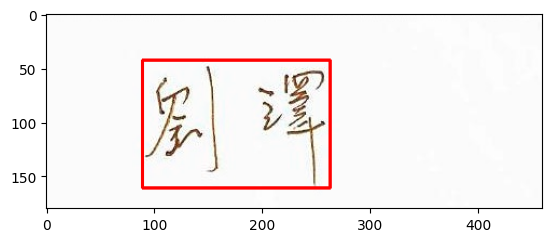

In [5]:
img = show_yolo_anno(
    './signature_centerize_data/images/DE502F_H0003.jpg',
    './signature_centerize_data/labels/DE502F_H0003.txt'
)

plt.imshow(img)